##

::: {.notes}
Hey there! Imagine you're driving to work every day. Some days, you zip through traffic without a hitch. Other days, you get stuck in jams or hit every red light. Now, think of the ups and downs of your drive as return volatility in the stock market.
:::

:::{.absolute top=75 left=200 width=350 height=100}
$$
\sigma = \sqrt{\frac{\sum_{i=1}^{n}(R_i - \mu)^2}{n-1}}
$$
:::


:::{.absolute top=250 left=100 width=600 height=400}
  
:::{.incremental .smaller}
1. Calculate the average return ($\mu$).
2. Subtract the average return from each individual return $R_{i} - \mu$.
3. Square these differences.
4. Sum up all the squared differences.
5. Divide by the number of returns minus one ($n-1$).
6. Take the square root of the result. 
 
:::
:::


##


In [2]:
%%capture
### Example Code:
import yfinance as yf
import numpy as np

# Get historical data
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
returns = data['Adj Close'].pct_change().dropna()

# Calculate average return
mu = np.mean(returns)

# Calculate squared differences from the mean
squared_diff = (returns - mu) ** 2

# Calculate variance
variance = np.sum(squared_diff) / (len(returns) - 1)

# Calculate volatility
volatility = np.sqrt(variance)

print("Volatility:", volatility)


In [3]:
%%capture

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data for Apple
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
returns = data['Adj Close'].pct_change().dropna()

# Calculate the moving average volatility
window = 21  # 21 trading days in a month 
rolling_volatility = returns.rolling(window=window).std() * np.sqrt(260)



## {background-image=../../pictures/green-screen.png, background-size=cover, background-repeat=no-repeat}

:::{.r-stretch}

:::{.absolute top="500" left="1" width="800" height="450"}

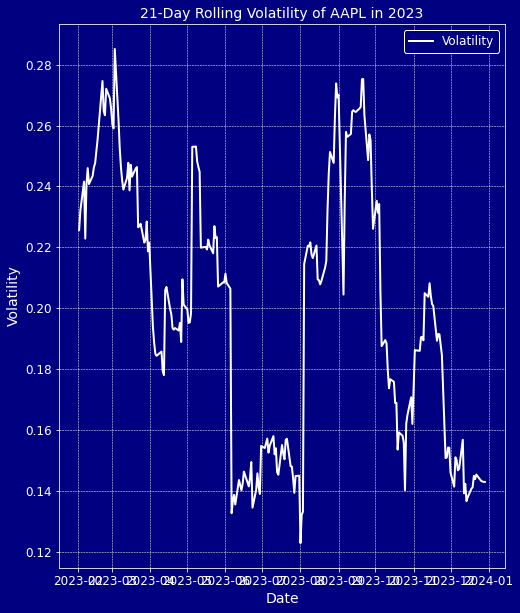

In [4]:
plt.figure(figsize=(8, 10))
plt.plot(rolling_volatility, color='white', linewidth=2)

# Customizing the plot
plt.title('21-Day Rolling Volatility of AAPL in 2023', fontsize=14, color='white')
plt.xlabel('Date', fontsize=14, color='white')
plt.ylabel('Volatility', fontsize=14, color='white')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.grid(True, color='white', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('navy')
plt.gcf().set_facecolor('navy')
plt.legend(['Volatility'], fontsize=12, loc='upper right', facecolor='navy', edgecolor='white', framealpha=1)

# Show plot
plt.show()

:::

:::

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download data
data = yf.download('SPY', start='2003-01-01', end='2023-01-01', interval='1wk')

# Calculate returns
data['Returns'] = data['Adj Close'].pct_change()

# Calculate rolling volatility (1-year window)
data['Volatility'] = data['Returns'].rolling(window=52).std() * np.sqrt(52)
data = data.dropna()

# Plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Volatility'], color='white', linewidth=2)
plt.title('Historical Volatility of SPY (Annualized)', fontsize=16, color='white')
plt.xlabel('Year', fontsize=14, color='white')
plt.ylabel('Volatility', fontsize=14, color='white')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.tick_params(axis='both', which='major', labelsize=12, colors='white')
plt.show()
